**Adesh Kumar**

**IIT(ISM) Dhanbad**

## Necessary libraries

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

import tqdm as tqdm
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from gensim.models import Word2Vec

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the data
Read train.csv and test.csv file

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/commonlitreadabilityprize/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/commonlitreadabilityprize/test.csv")
print("Shape of train data: ", train_data.shape)
print("attributes in train data: ", train_data.columns.values)
print("="*50)
print("Shape of test data: ", test_data.shape)
print("attributes in test data: ", test_data.columns.values)

Shape of train data:  (2834, 6)
attributes in train data:  ['id' 'url_legal' 'license' 'excerpt' 'target' 'standard_error']
Shape of test data:  (7, 4)
attributes in test data:  ['id' 'url_legal' 'license' 'excerpt']


## Exploratory data Analysis

In [ ]:
train_data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [ ]:
test_data.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [ ]:
print("Number of null values in train data attribute wise:")
print(train_data.isnull().sum())
print("="*50)
print("Number of null values in test data attribute wise:")
print(test_data.isnull().sum())

Number of null values in train data attribute wise:
id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64
Number of null values in test data attribute wise:
id           0
url_legal    4
license      4
excerpt      0
dtype: int64


**Hands on Feature Engineering**

**Word_count:** Total Number of words in excerpts

**excerpt_len:** length of excerpt text

**ratio:** ratio of word_count and excerpt_len

**TWC:** token word count in excerpt

**PWC:** word count after processing in excerpt

**SWC:** stop words count in excerpt

In [ ]:
def word_count(text):
    text = text.split()
    return len(text)

In [ ]:
train_data["word_count"] = train_data["excerpt"].apply(lambda x: word_count(x))
train_data["excerpt_len"] = train_data["excerpt"].apply(lambda x: len(x))

test_data["word_count"] = test_data["excerpt"].apply(lambda x: word_count(x))
test_data["excerpt_len"] = test_data["excerpt"].apply(lambda x: len(x))

In [ ]:
train_data['ratio'] = np.divide(train_data['word_count'], train_data['excerpt_len'])
test_data['ratio'] = np.divide(test_data['word_count'], test_data['excerpt_len'])

In [ ]:
train_data.head()

,id,url_legal,license,excerpt,target,standard_error,word_count,excerpt_len,ratio
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,179,992,0.180444
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,169,937,0.180363
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,166,908,0.182819
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,164,909,0.180418
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,723,0.203320


In [ ]:
train_data = train_data.drop(106)
#index_names = train_data[(train_data['standard_error'] > 0.575) ].index
#train_data.drop(index_names, inplace = True)
train_data.describe()

,target,standard_error,word_count,excerpt_len,ratio
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,-0.959657,0.491609,172.992940,971.804095,0.178947
std,1.033604,0.033577,16.967398,117.216975,0.013281
min,-3.676268,0.428233,135.000000,669.000000,0.123703
25%,-1.691501,0.468553,159.000000,885.000000,0.170282
50%,-0.913322,0.484748,175.000000,971.000000,0.179426
75%,-0.203079,0.506304,188.000000,1058.000000,0.188295
max,1.711390,0.649671,205.000000,1341.000000,0.235149


Text(0.5, 0, 'standard error')

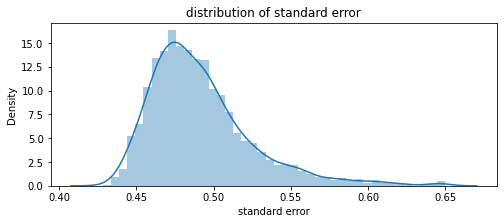

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(train_data['standard_error'].values)
plt.title("distribution of standard error")
plt.xlabel("standard error")

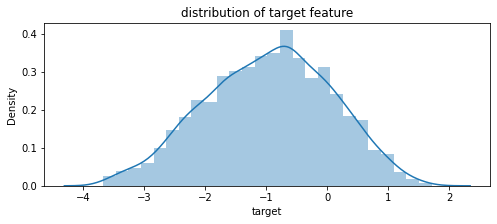

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(train_data['target'].values)
plt.title("distribution of target feature")
plt.xlabel("target")
plt.show()


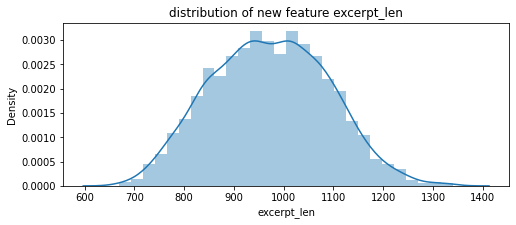

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(train_data['excerpt_len'].values)
plt.title("distribution of new feature excerpt_len")
plt.xlabel("excerpt_len")
plt.show()

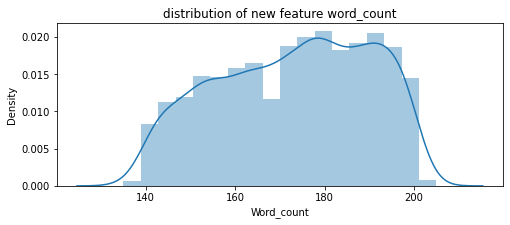

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(train_data['word_count'].values)
plt.title("distribution of new feature word_count")
plt.xlabel("Word_count")
plt.show()

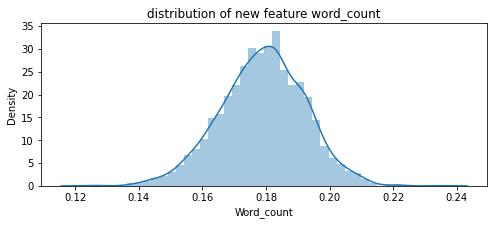

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(train_data['ratio'].values)
plt.title("distribution of new feature word_count")
plt.xlabel("Word_count")
plt.show()

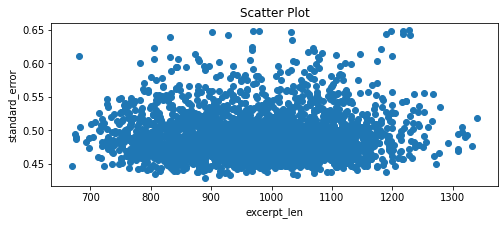

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(train_data['excerpt_len'], train_data['standard_error'])
plt.title("Scatter Plot")
plt.xlabel("excerpt_len")
plt.ylabel("standard_error")
plt.show()

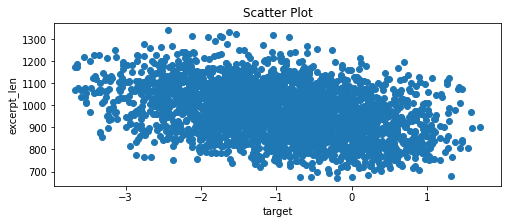

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(train_data['target'], train_data['excerpt_len'])
plt.title("Scatter Plot")
plt.xlabel("target")
plt.ylabel("excerpt_len")
plt.show()

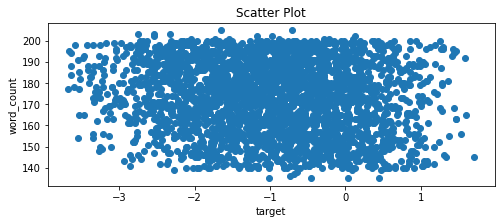

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(train_data['target'], train_data['word_count'])
plt.title("Scatter Plot")
plt.xlabel("target")
plt.ylabel("word_count")
plt.show()

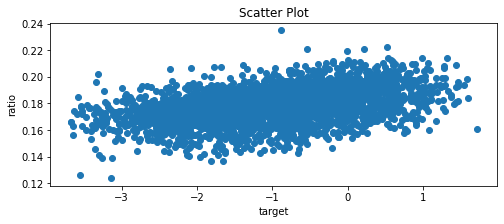

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(train_data['target'], train_data['ratio'])
plt.title("Scatter Plot")
plt.xlabel("target")
plt.ylabel("ratio")
plt.show()

## Data preprocessing

**Text Processing (NLP)**

In [ ]:
sent_0 = train_data['excerpt'].values[1]
print(sent_0)
print("="*50)

All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.


In [ ]:
# remove urls:
text = "I am going to home 34 $,<a />https://www.kaggle.com/gangwaradesh/commonlit-readability/edit<a /><a />is't necessary at home3452"
print("Before: ",text)
text = re.sub(r"http\S+","", text)
print("After: ",text)

Before:  I am going to home 34 $,<a />https://www.kaggle.com/gangwaradesh/commonlit-readability/edit<a /><a />is't necessary at home3452
After:  I am going to home 34 $,<a /> /><a />is't necessary at home3452


In [ ]:
# removing all html tags
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

In [ ]:
print("Before: ",text)
text = remove_tags(text)
print("After: ",text)

Before:  I am going to home 34 $,<a /> /><a />is't necessary at home3452
After:  I am going to home 34 $, />is't necessary at home3452


In [ ]:
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
print("Before: ",text)
text = decontracted(text)
print("After: ",text)

Before:  I am going to home 34 $, />is't necessary at home3452
After:  I am going to home 34 $, />is not necessary at home3452


In [ ]:
#remove words with numbers, example: dsesf233,252gsafs, 45, 3633

#https://stackoverflow.com/questions/18082130/python-regex-to-remove-all-words-which-contains-number/18082370#18082370
print("Before: ",text)
text = re.sub("\S*\d\S*", "", text).strip()
print("After: ",text)

Before:  I am going to home 34 $, />is not necessary at home3452
After:  I am going to home  $, />is not necessary at


In [ ]:
# Remove special character
print("Before: ",text)
text = re.sub('[^A-Za-z]+', ' ', text)
print("After: ",text)

Before:  I am going to home  $, />is not necessary at
After:  I am going to home is not necessary at


**Remove stop words**

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_words)

{'he', 'below', 'herself', 'these', "doesn't", 'other', 'of', 'mustn', "you'd", 'yourself', 'who', 'again', 'the', 'yourselves', 'does', 'what', "you're", 'up', 'can', 'each', "hasn't", "don't", 'needn', 'an', 'but', 'between', 'himself', 'hadn', 'yours', 'more', 'you', 'won', 'nor', 'are', 's', 'because', 'being', 'into', 'll', 'before', 'themselves', 'wouldn', 'both', 'do', 'have', 'now', 'not', 'wasn', 'than', "you'll", 'their', 'any', 'couldn', 'shouldn', 'very', "isn't", 'then', 'when', 'those', 'as', 'such', 'itself', 'further', 'over', 'where', 'most', 'weren', 'and', 'above', 'had', 'having', 'me', 'i', 'same', 'them', 'o', "that'll", "wasn't", 'there', "shouldn't", 'or', 'isn', "it's", 't', 'just', 'hers', 'through', 'no', 'didn', 'mightn', 're', 'my', 'with', 'this', 'some', 'our', 'doing', 'm', 'y', 'ain', 'ma', 'him', 'which', 'until', 'too', 'will', 'were', "should've", "wouldn't", "didn't", 'was', 'on', "haven't", "mustn't", 'aren', 'against', "aren't", 'haven', "you've",

In [ ]:
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
text = text.lower()
def remove_stopwords(text):
    
    stop_words = set(stopwords.words('english'))
    clean_text = ''
    for w in text.split():
        if w not in stop_words:
            clean_text = clean_text + " " + w
    return clean_text.strip()

In [ ]:
print("Before: ",text)
text = remove_stopwords(text)
print("After: ",text)

Before:  i am going to home is not necessary at
After:  going home necessary


**Stemming**

In [ ]:
#https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
nltk.download('punkt')
def text_stemming(text):
    sbs = SnowballStemmer(language='english')
    words = word_tokenize(text)
    new_text = ''
    for w in words:
        new_text = new_text + " " + sbs.stem(w)
    return new_text.strip()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print("Before: ",text)
text = text_stemming(text)
print("After: ",text)

Before:  going home necessary
After:  go home necessari


In [ ]:
def text_process(text):
    text = re.sub(r"http\S+","", text)
    text = remove_tags(text)
    text = decontracted(text)
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.lower()
    return text

In [ ]:
text = "I am going to home 34 $,<a />https://www.kaggle.com/gangwaradesh/commonlit-readability/edit<a /><a />is't necessary at home3452"
print("Before: ",text)
text = text_process(text)
text = remove_stopwords(text)
text = text_stemming(text)
print("After:",text)

Before:  I am going to home 34 $,<a />https://www.kaggle.com/gangwaradesh/commonlit-readability/edit<a /><a />is't necessary at home3452
After: go home necessari


In [ ]:
train_data["process_excerpt"] = train_data["excerpt"].apply(lambda x: text_process(x))
test_data["process_excerpt"] = test_data["excerpt"].apply(lambda x: text_process(x))
train_data.head()

,id,url_legal,license,excerpt,target,standard_error,word_count,excerpt_len,ratio,process_excerpt
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,179,992,0.180444,when the young people returned to the ballroom...
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,169,937,0.180363,all through dinner time mrs fayre was somewhat...
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,166,908,0.182819,as roger had predicted the snow departed as qu...
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,164,909,0.180418,and outside before the palace a great garden w...
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,723,0.203320,once upon a time there were three bears who li...


**TWC:** token word count in excerpt

**PWC:** word count after processing in excerpt

**SWC:** stop words count in excerpt

In [ ]:
train_data["TWC"] = train_data["process_excerpt"].apply(lambda x: word_count(x))
test_data["TWC"] = test_data["process_excerpt"].apply(lambda x: word_count(x))

In [ ]:
train_data["process_excerpt"] = train_data["process_excerpt"].apply(lambda x: remove_stopwords(x))
test_data["process_excerpt"] = test_data["process_excerpt"].apply(lambda x: remove_stopwords(x))
train_data["process_excerpt"] = train_data["process_excerpt"].apply(lambda x: text_stemming(x))
test_data["process_excerpt"] = test_data["process_excerpt"].apply(lambda x: text_stemming(x))
train_data.head()

In [ ]:
text_0 = train_data['excerpt'].values[0]
print("Raw text:\n")
print(text_0)
print("="*100)

print("Process text:\n")
text_0 = train_data['process_excerpt'].values[0]
print(text_0)
print("="*100)

Raw text:

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowsho

In [ ]:
train_data["PWC"] = train_data["process_excerpt"].apply(lambda x: word_count(x))
test_data["PWC"] = test_data["process_excerpt"].apply(lambda x: word_count(x))
train_data["SWC"] = train_data["TWC"] - train_data["PWC"]
test_data["SWC"] = test_data["TWC"] - test_data["PWC"]
train_data.head()

,id,url_legal,license,excerpt,target,standard_error,word_count,excerpt_len,ratio,process_excerpt,TWC,PWC,SWC
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,179,992,0.180444,young peopl return ballroom present decid chan...,181,91,90
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,169,937,0.180363,dinner time mrs fayr somewhat silent eye rest ...,172,85,87
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,166,908,0.182819,roger predict snow depart quick came two day s...,172,84,88
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,164,909,0.180418,outsid palac great garden wall round fill full...,167,94,73
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,723,0.203320,upon time three bear live togeth hous wood one...,151,74,77


In [ ]:
train_data['TW_PW_ratio'] = np.divide(train_data['TWC'],train_data['PWC'])
test_data['TW_PW_ratio'] = np.divide(test_data['TWC'],test_data['PWC'])

## Train, CV and Test split

In [ ]:
y = train_data['target'].values
X = train_data.drop(['target'], axis=1)
X.head(2)

,id,url_legal,license,excerpt,standard_error,word_count,excerpt_len,ratio,process_excerpt,TWC,PWC,SWC,TW_PW_ratio
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,0.464009,179,992,0.180444,young peopl return ballroom present decid chan...,181,91,90,1.989011
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",0.480805,169,937,0.180363,dinner time mrs fayr somewhat silent eye rest ...,172,85,87,2.023529


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.10, random_state = 0)

# Make Data Model ready

## 1.1 encoding process_excerpt: Bag of Words

In [ ]:
vectorizer = CountVectorizer(min_df = 10, ngram_range = (1,2))
X_train_excerpt_bow = vectorizer.fit_transform(X_train['process_excerpt'].values)
X_cv_excerpt_bow = vectorizer.transform(X_cv['process_excerpt'])
X_test_excerpt_bow = vectorizer.transform(X_test['process_excerpt'].values)
test_data_excerpt_bow = vectorizer.transform(test_data['process_excerpt'].values)

print(X_train_excerpt_bow.shape)
print(X_cv_excerpt_bow.shape)
print(X_test_excerpt_bow.shape)
print(test_data_excerpt_bow.shape)

(2294, 2924)
(255, 2924)
(284, 2924)
(7, 2924)


## 1.2 encoding process_excerpt: TFIDF

In [ ]:
vectorizer = TfidfVectorizer(min_df = 10, ngram_range = (1,2))
X_train_excerpt_Tfidf = vectorizer.fit_transform(X_train['process_excerpt'].values)
X_cv_excerpt_Tfidf = vectorizer.transform(X_cv['process_excerpt'])
X_test_excerpt_Tfidf = vectorizer.transform(X_test['process_excerpt'].values)
test_data_excerpt_Tfidf = vectorizer.transform(test_data['process_excerpt'].values)
dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))

print(X_train_excerpt_Tfidf.shape)
print(X_cv_excerpt_Tfidf.shape)
print(X_test_excerpt_Tfidf.shape)
print(test_data_excerpt_Tfidf.shape)

(2294, 2924)
(255, 2924)
(284, 2924)
(7, 2924)


## 1.2 encoding process_excerpt: TFIDF weighted W2V

In [ ]:
list_of_sentence = []
for sentence in X_train['process_excerpt']:
    list_of_sentence.append(sentence.split())

In [ ]:
w2v_model = Word2Vec(list_of_sentence, min_count = 5, size = 500, workers = 4)
w2v_words = list(w2v_model.wv.vocab.keys())

In [ ]:
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm.tqdm(X_train['process_excerpt'].values): # for each review/sentence
    vector = np.zeros(500) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in w2v_words:
            vector += w2v_model.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)
    
avg_w2v_vectors_train = coo_matrix(np.array(avg_w2v_vectors_train))
avg_w2v_vectors_train.shape

100%|██████████| 2294/2294 [00:08<00:00, 262.14it/s]


(2294, 500)

In [ ]:
tfidf_feat = vectorizer.get_feature_names()
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm.tqdm(X_train['process_excerpt'].values): # for each review/sentence
    sent_vector = np.zeros(500) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vector = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence))
            sent_vector += (vector*tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vector /= weight_sum
    tfidf_w2v_vectors_train.append(sent_vector)
    
tfidf_w2v_vectors_train = coo_matrix(np.array(tfidf_w2v_vectors_train))
tfidf_w2v_vectors_train.shape

100%|██████████| 2294/2294 [00:21<00:00, 108.38it/s]


(2294, 500)

In [ ]:
tfidf_feat = vectorizer.get_feature_names()
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm.tqdm(X_cv['process_excerpt'].values): # for each review/sentence
    sent_vector = np.zeros(500) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vector = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence))
            sent_vector += (vector*tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vector /= weight_sum
    tfidf_w2v_vectors_cv.append(sent_vector)
    
tfidf_w2v_vectors_cv = coo_matrix(np.array(tfidf_w2v_vectors_cv))
tfidf_w2v_vectors_cv.shape

100%|██████████| 255/255 [00:02<00:00, 107.85it/s]


(255, 500)

In [ ]:
tfidf_feat = vectorizer.get_feature_names()
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm.tqdm(X_test['process_excerpt'].values): # for each review/sentence
    sent_vector = np.zeros(500) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vector = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence))
            sent_vector += (vector*tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vector /= weight_sum
    tfidf_w2v_vectors_test.append(sent_vector)
    
tfidf_w2v_vectors_test = coo_matrix(np.array(tfidf_w2v_vectors_test))
tfidf_w2v_vectors_test.shape

100%|██████████| 284/284 [00:02<00:00, 108.05it/s]


(284, 500)

In [ ]:
tfidf_feat = vectorizer.get_feature_names()
tfidf_w2v_vectors_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm.tqdm(test_data['process_excerpt'].values): # for each review/sentence
    sent_vector = np.zeros(500) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vector = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence))
            sent_vector += (vector*tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vector /= weight_sum
    tfidf_w2v_vectors_test_data.append(sent_vector)
    
tfidf_w2v_vectors_test_data = coo_matrix(np.array(tfidf_w2v_vectors_test_data))
tfidf_w2v_vectors_test_data.shape

100%|██████████| 7/7 [00:00<00:00, 89.24it/s]


(7, 500)

## 2. encoding word_count: MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train['word_count'].values.reshape(-1, 1))
X_train_word_nr = scaler.transform(X_train['word_count'].values.reshape(-1,1))
X_test_word_nr = scaler.transform(X_test['word_count'].values.reshape(-1,1))
X_cv_word_nr = scaler.transform(X_cv['word_count'].values.reshape(-1,1))
test_data_word_nr = scaler.transform(test_data['word_count'].values.reshape(-1,1))

print(X_train_word_nr.shape)
print(X_cv_word_nr.shape)
print(X_test_word_nr.shape)
print(test_data_word_nr.shape)

(2294, 1)
(255, 1)
(284, 1)
(7, 1)


## 3. encoding excerpt_len: MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train['excerpt_len'].values.reshape(-1, 1))
X_train_len_nr = scaler.transform(X_train['excerpt_len'].values.reshape(-1,1))
X_test_len_nr = scaler.transform(X_test['excerpt_len'].values.reshape(-1,1))
X_cv_len_nr = scaler.transform(X_cv['excerpt_len'].values.reshape(-1,1))
test_data_len_nr = scaler.transform(test_data['excerpt_len'].values.reshape(-1,1))

print(X_train_len_nr.shape)
print(X_cv_len_nr.shape)
print(X_test_len_nr.shape)
print(test_data_len_nr.shape)

(2294, 1)
(255, 1)
(284, 1)
(7, 1)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train['TWC'].values.reshape(-1, 1))
X_train_twc_nr = scaler.transform(X_train['TWC'].values.reshape(-1,1))
X_test_twc_nr = scaler.transform(X_test['TWC'].values.reshape(-1,1))
X_cv_twc_nr = scaler.transform(X_cv['TWC'].values.reshape(-1,1))
test_data_twc_nr = scaler.transform(test_data['TWC'].values.reshape(-1,1))

print(X_train_twc_nr.shape)
print(X_cv_twc_nr.shape)
print(X_test_twc_nr.shape)
print(test_data_twc_nr.shape)

(2294, 1)
(255, 1)
(284, 1)
(7, 1)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train['PWC'].values.reshape(-1, 1))
X_train_pwc_nr = scaler.transform(X_train['PWC'].values.reshape(-1,1))
X_test_pwc_nr = scaler.transform(X_test['PWC'].values.reshape(-1,1))
X_cv_pwc_nr = scaler.transform(X_cv['PWC'].values.reshape(-1,1))
test_data_pwc_nr = scaler.transform(test_data['PWC'].values.reshape(-1,1))

print(X_train_pwc_nr.shape)
print(X_cv_pwc_nr.shape)
print(X_test_pwc_nr.shape)
print(test_data_pwc_nr.shape)

(2294, 1)
(255, 1)
(284, 1)
(7, 1)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train['SWC'].values.reshape(-1, 1))
X_train_swc_nr = scaler.transform(X_train['SWC'].values.reshape(-1,1))
X_test_swc_nr = scaler.transform(X_test['SWC'].values.reshape(-1,1))
X_cv_swc_nr = scaler.transform(X_cv['SWC'].values.reshape(-1,1))
test_data_swc_nr = scaler.transform(test_data['SWC'].values.reshape(-1,1))

print(X_train_swc_nr.shape)
print(X_cv_swc_nr.shape)
print(X_test_swc_nr.shape)
print(test_data_swc_nr.shape)

(2294, 1)
(255, 1)
(284, 1)
(7, 1)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train['TW_PW_ratio'].values.reshape(-1, 1))
X_train_TW_PW_ratio_nr = scaler.transform(X_train['TW_PW_ratio'].values.reshape(-1,1))
X_test_TW_PW_ratio_nr = scaler.transform(X_test['TW_PW_ratio'].values.reshape(-1,1))
X_cv_TW_PW_ratio_nr = scaler.transform(X_cv['TW_PW_ratio'].values.reshape(-1,1))
test_data_TW_PW_ratio_nr = scaler.transform(test_data['TW_PW_ratio'].values.reshape(-1,1))

print(X_train_TW_PW_ratio_nr.shape)
print(X_cv_TW_PW_ratio_nr.shape)
print(X_test_TW_PW_ratio_nr.shape)
print(test_data_TW_PW_ratio_nr.shape)

(2294, 1)
(255, 1)
(284, 1)
(7, 1)


**Combine all**

In [ ]:
X_tr = hstack([tfidf_w2v_vectors_train, X_train_len_nr, X_train_word_nr, X_train_twc_nr, X_train_pwc_nr, X_train_swc_nr, X_train['ratio'].values.reshape(-1,1)]).tocsr()
X_cr = hstack([tfidf_w2v_vectors_cv, X_cv_len_nr, X_cv_word_nr, X_cv_twc_nr,X_cv_pwc_nr, X_cv_swc_nr, X_cv['ratio'].values.reshape(-1,1)]).tocsr()
X_te = hstack([tfidf_w2v_vectors_test, X_test_len_nr, X_test_word_nr, X_test_twc_nr, X_test_pwc_nr, X_test_swc_nr, X_test['ratio'].values.reshape(-1,1)]).tocsr()
test_da = hstack([tfidf_w2v_vectors_test_data, test_data_len_nr, test_data_word_nr, test_data_twc_nr, test_data_pwc_nr, test_data_swc_nr, test_data['ratio'].values.reshape(-1,1)]).tocsr()

print(X_tr.shape)
print(X_cr.shape)
print(X_te.shape)
print(test_da.shape)

(2294, 506)
(255, 506)
(284, 506)
(7, 506)


# 1. Regression Model: TFIDF Weighted Word2Vec

##1.1 KNN Model

**Hyper parameter tuning**

100%|██████████| 14/14 [01:45<00:00,  7.57s/it]


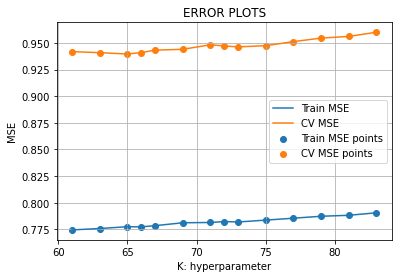

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

train_mse = []
cv_mse = []
K = [61,63,65,66,67,69,71,72,73,75,77,79,81,83]
for i in tqdm.tqdm(K):
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(X_tr, y_train)

    y_train_pred = neigh.predict(X_tr)   
    y_cv_pred = neigh.predict(X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_mse.append(mean_squared_error(y_train,y_train_pred))
    cv_mse.append(mean_squared_error(y_cv, y_cv_pred))

plt.plot(K, train_mse, label='Train MSE')
plt.plot(K, cv_mse, label='CV MSE')

plt.scatter(K, train_mse, label='Train MSE points')
plt.scatter(K, cv_mse, label='CV MSE points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("MSE")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
# Best K
best_k = 65
neighbor = KNeighborsRegressor(n_neighbors = best_k)
neighbor.fit(X_tr, y_train)
y_test_pred = neighbor.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.9971563880354178


## 1.2 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8397281382191332


##1.3 Random Forest Regression Model

100%|██████████| 7/7 [27:29<00:00, 235.61s/it]


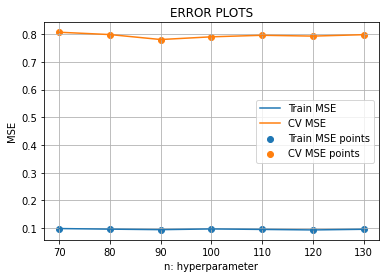

In [ ]:
from sklearn.ensemble import RandomForestRegressor
train_mse = []
cv_mse = []
n = [70,80, 90, 100, 110, 120, 130]
for i in tqdm.tqdm(n):
    lr = RandomForestRegressor(n_estimators = i, )
    lr.fit(X_tr, y_train)

    y_train_pred = lr.predict(X_tr)   
    y_cv_pred = lr.predict(X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_mse.append(mean_squared_error(y_train,y_train_pred))
    cv_mse.append(mean_squared_error(y_cv, y_cv_pred))

plt.plot(n, train_mse, label='Train MSE')
plt.plot(n, cv_mse, label='CV MSE')

plt.scatter(n, train_mse, label='Train MSE points')
plt.scatter(n, cv_mse, label='CV MSE points')

plt.legend()
plt.xlabel("n: hyperparameter")
plt.ylabel("MSE")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators = 90, random_state = 42)
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8229056389154296


##1.4 GradientBoosting Regression Model

In [ ]:
lr = GradientBoostingRegressor(n_estimators = 110)
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))


0.7873638058109237


##1.5 Linear Support Vector Regression Model

In [ ]:
lr = LinearSVR(random_state = 42)
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8629634102409666


#1.6 RidgeCV Model

In [ ]:
from sklearn.linear_model import RidgeCV
lr = RidgeCV()
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8073033523314266


## 1.7 Multi Layer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPRegressor
lr = MLPRegressor()
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8377228503200549


## 1.8 Stacking Regression Model

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('knn', KNeighborsRegressor(n_neighbors = 21)),
    ('RFR', RandomForestRegressor(n_estimators = 110, random_state = 42)),
    ('GBDT', GradientBoostingRegressor(n_estimators = 110)),
    ('SVM', LinearSVR(random_state = 42)),
    ('RCV', RidgeCV()),
    ('MLP', MLPRegressor())
]
reg = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())
reg.fit(X_tr, y_train)
y_test_pred = reg.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.7568266455997712


# 2. Regression Model: TFIDF 

In [ ]:
X_tr = hstack([X_train_excerpt_Tfidf, X_train_len_nr, X_train_word_nr, X_train_twc_nr, X_train_pwc_nr, X_train_swc_nr, X_train['ratio'].values.reshape(-1,1)]).tocsr()
X_cr = hstack([X_cv_excerpt_Tfidf, X_cv_len_nr, X_cv_word_nr, X_cv_twc_nr,X_cv_pwc_nr, X_cv_swc_nr, X_cv['ratio'].values.reshape(-1,1)]).tocsr()
X_te = hstack([X_test_excerpt_Tfidf, X_test_len_nr, X_test_word_nr, X_test_twc_nr, X_test_pwc_nr, X_test_swc_nr, X_test['ratio'].values.reshape(-1,1)]).tocsr()
test_da = hstack([test_data_excerpt_Tfidf, test_data_len_nr, test_data_word_nr, test_data_twc_nr, test_data_pwc_nr, test_data_swc_nr, test_data['ratio'].values.reshape(-1,1)]).tocsr()

print(X_tr.shape)
print(X_cr.shape)
print(X_te.shape)
print(test_da.shape)

(2294, 2930)
(255, 2930)
(284, 2930)
(7, 2930)


##2.1 KNN Model

In [ ]:
# Best K
best_k = 65
neighbor = KNeighborsRegressor(n_neighbors = best_k)
neighbor.fit(X_tr, y_train)
y_test_pred = neighbor.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8042015465230331


##2.2 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

2.0290668319670924


##2.3 Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators = 90, random_state = 42)
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.7443472108076541


##2.4 GradientBoosting Regression Model

In [ ]:
lr = GradientBoostingRegressor(n_estimators = 110)
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.7484020607952598


## 2.5 Linear Support Vector Regression Model

In [ ]:
lr = LinearSVR(random_state = 42)
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.6484080878716683


##2.6 RidgeCV Model

In [ ]:
from sklearn.linear_model import RidgeCV
lr = RidgeCV()
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.6161073206780283


##2.7 Multi Layer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPRegressor
lr = MLPRegressor()
lr.fit(X_tr, y_train)
y_test_pred = lr.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.8843513490816308


## Stacking Regression Model

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('knn', KNeighborsRegressor(n_neighbors = 21)),
    ('RFR', RandomForestRegressor(n_estimators = 110, random_state = 42)),
    ('GBDT', GradientBoostingRegressor(n_estimators = 110)),
    ('SVM', LinearSVR(random_state = 42)),
    ('RCV', RidgeCV()),
    ('MLP', MLPRegressor())
]
reg = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())
reg.fit(X_tr, y_train)
y_test_pred = reg.predict(X_te)
print(mean_squared_error(y_test_pred,y_test))

0.5981126473289778


## Make submission

In [ ]:
test_data['target'] = reg.predict(test_da)

In [ ]:
submission = test_data[['id','target']]
submission.head(8)

,id,target
0,c0f722661,-0.914382
1,f0953f0a5,-0.402109
2,0df072751,-0.726457
3,04caf4e0c,-1.745953
4,0e63f8bea,-1.749591
5,12537fe78,-0.589353
6,965e592c0,0.333257


In [ ]:
filename = 'submission.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: submission.csv
